In [ ]:
!pip install requests pandas openpyxl

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import os



🔝 Top 5 Cryptocurrencies by Market Capitalization:
  Cryptocurrency Name  Market Capitalization
0             Bitcoin          1698046139336
1            Ethereum           266611876763
2              Tether           142358149569
3                 XRP           130529150782
4                 BNB            88381923827

📊 Average Price of Top 50 Cryptocurrencies (USD): $5416.61

📈 Highest 24h Price Change:
Cryptocurrency Name      Hedera
24h Price Change (%)    8.73936
Name: 12, dtype: object

📉 Lowest 24h Price Change:
Cryptocurrency Name     Litecoin
24h Price Change (%)    -3.65283
Name: 19, dtype: object


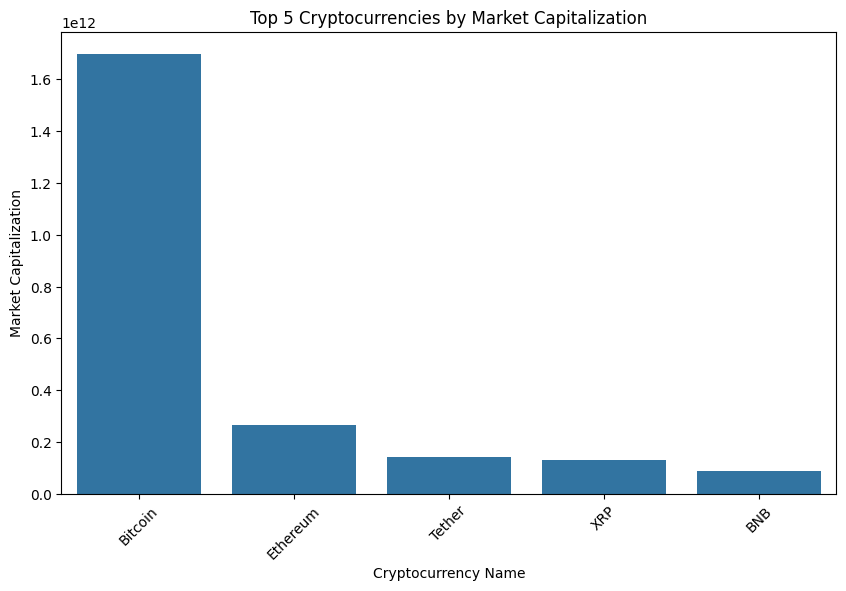

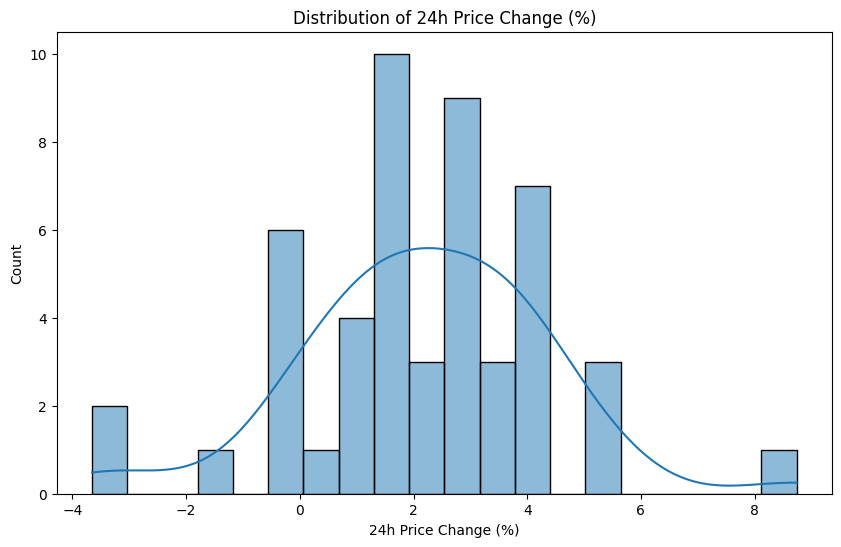

✅ Excel updated at 2025-03-02 14:03:25
Download the latest file manually from the Files tab on the left.

🔝 Top 5 Cryptocurrencies by Market Capitalization:
  Cryptocurrency Name  Market Capitalization
0             Bitcoin          1698046139336
1            Ethereum           266611876763
2              Tether           142358149569
3                 XRP           130529150782
4                 BNB            88381923827

📊 Average Price of Top 50 Cryptocurrencies (USD): $5416.61

📈 Highest 24h Price Change:
Cryptocurrency Name      Hedera
24h Price Change (%)    8.73936
Name: 12, dtype: object

📉 Lowest 24h Price Change:
Cryptocurrency Name     Litecoin
24h Price Change (%)    -3.65283
Name: 19, dtype: object


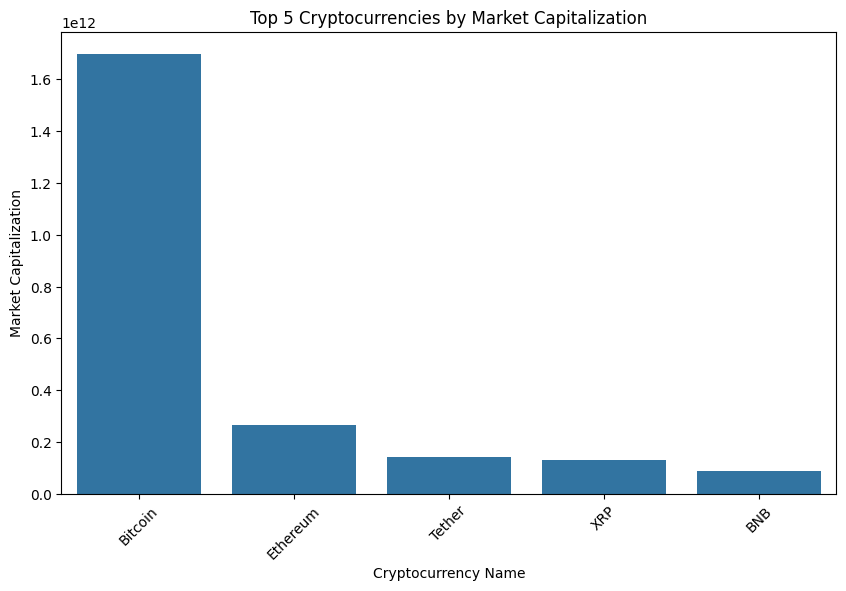

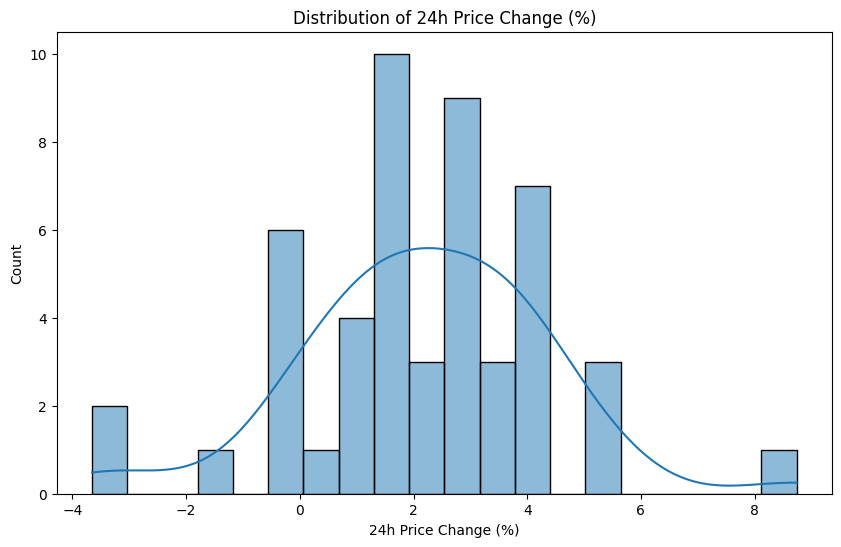

✅ Excel updated at 2025-03-02 14:03:58
Download the latest file manually from the Files tab on the left.
⏹️ Stopped live updates.


In [11]:
import requests
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fetch live cryptocurrency data using API
def fetch_top_50_crypto():
    url = 'https://api.coingecko.com/api/v3/coins/markets'
    params = {
        'vs_currency': 'usd',
        'order': 'market_cap_desc',
        'per_page': 50,
        'page': 1,
        'sparkline': 'false'
    }
    response = requests.get(url, params=params)
    if response.status_code != 200:
        print("Failed to fetch data", response.status_code)
        return None
    data = response.json()

    # Processing data into DataFrame
    df = pd.DataFrame(data)[['name', 'symbol', 'current_price', 'market_cap', 'total_volume', 'price_change_percentage_24h']]
    df.columns = ['Cryptocurrency Name', 'Symbol', 'Current Price (USD)', 'Market Capitalization', '24h Trading Volume', '24h Price Change (%)']
    return df

# Function to perform data analysis
def analyze_crypto_data(df):
    top_5_by_market_cap = df.nlargest(5, 'Market Capitalization')
    average_price = df['Current Price (USD)'].mean()
    highest_price_change = df.loc[df['24h Price Change (%)'].idxmax()]
    lowest_price_change = df.loc[df['24h Price Change (%)'].idxmin()]

    print("\n🔝 Top 5 Cryptocurrencies by Market Capitalization:")
    print(top_5_by_market_cap[['Cryptocurrency Name', 'Market Capitalization']])

    print(f"\n📊 Average Price of Top 50 Cryptocurrencies (USD): ${average_price:.2f}")

    print("\n📈 Highest 24h Price Change:")
    print(highest_price_change[['Cryptocurrency Name', '24h Price Change (%)']])

    print("\n📉 Lowest 24h Price Change:")
    print(lowest_price_change[['Cryptocurrency Name', '24h Price Change (%)']])

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Cryptocurrency Name', y='Market Capitalization', data=top_5_by_market_cap)
    plt.title('Top 5 Cryptocurrencies by Market Capitalization')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df['24h Price Change (%)'], bins=20, kde=True)
    plt.title('Distribution of 24h Price Change (%)')
    plt.show()

# Function to update Excel sheet
def update_excel():
    df = fetch_top_50_crypto()
    if df is not None:
        analyze_crypto_data(df)

        # Add timestamp for last update
        df['Last Updated'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

        # Save data to Excel file
        file_name = '/content/Live_Crypto_Data.xlsx'
        df.to_excel(file_name, index=False)

        print(f"✅ Excel updated at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print("Download the latest file manually from the Files tab on the left.")

# Function to schedule updates every 5 minutes
def schedule_updates(interval=300):
    try:
        while True:
            update_excel()
            time.sleep(interval)
    except KeyboardInterrupt:
        print("⏹️ Stopped live updates.")

# Run the scheduler
schedule_updates()